#### February 5, 2024 - Machine Learning for Cities

# Introduction to Scikit-learn (sklearn)

1. Preprocessing (covered last week).

2. Supervised Learning.

3. Model selection.

4. Decision trees.

5. Random forests.

In [1]:
# Check your version and make sure >0.18
import pandas as pd
import numpy as np
import sklearn
sklearn.__version__

'0.24.0'

Sklearn has a ton of methods implemented, many of which we will see later in the course!

### Supervised Learning 

(Regression/Classification)

Linear Models (Ordinary Least Squares, Logistic Regression, Lasso and Ridge...)

Kernel regression

SVM

Gaussian Processes

Decision Trees and Random Forests (next class)

Naive Bayes

Supervised Neural Network models (incl. Deep Learning)

### Unsupervised Learning

Clustering.

Dimension Reduction.

Representation in Neural Networks such as RBM

### Logistic Regression

In [2]:
import matplotlib.pyplot as plt
from sklearn import linear_model, datasets

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

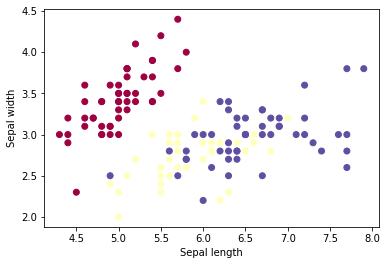

In [3]:
# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Spectral)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

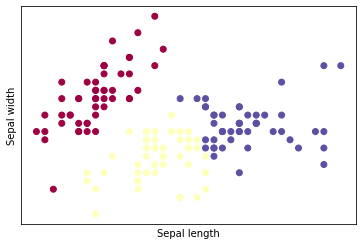

In [4]:
# Choose an appropriate machine learning model.  Here we create an instance of logistic regression classifier.
logreg = linear_model.LogisticRegression()

# Train the model with the "fit" function, and predict using the "predict" function
logreg.fit(X, Y)

# now the color represents the predicted class
plt.scatter(X[:, 0], X[:, 1], c=logreg.predict(X), cmap=plt.cm.Spectral)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xticks(())
plt.yticks(())

plt.show()


### Tips: How to use packages from sklearn.

Step one: What is the problem we want to solve and what is the model we want to fit. 

Step two: What are the hyper-parameters related to model structure.

Step three: What are the inputs dataframe and what are the parameters we want to tune.

Step four: What are hyper-parameters for training process. (learning rate, iteration max...)

Step five: What are the outputs and tuned parameters.

### Penalized Linear Regression

In [5]:
X = np.random.random((10,10))
y = 5*(X[:,1]-0.5)+3*(X[:,5]-0.5)+np.random.random(10)

In [6]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9
0,0.961923,0.944040,0.771092,0.571035,0.085671,0.143731,0.577284,0.005716,0.161928,0.925263
1,0.839535,0.046787,0.980974,0.145269,0.827904,0.109473,0.162285,0.695805,0.662025,0.151814
2,0.204059,0.441705,0.228936,0.888624,0.251268,0.929768,0.051337,0.135037,0.963704,0.651378
3,0.956177,0.223483,0.727388,0.542166,0.565752,0.862774,0.259083,0.488839,0.695185,0.472604
4,0.647880,0.155328,0.901159,0.913438,0.387633,0.360407,0.606484,0.038081,0.479002,0.381313
5,0.503314,0.491806,0.747447,0.736006,0.905601,0.641828,0.344309,0.916485,0.269188,0.177600
6,0.437868,0.097156,0.055163,0.163929,0.312283,0.079986,0.562525,0.721494,0.121085,0.478800
7,0.258534,0.211555,0.615513,0.552688,0.325236,0.253935,0.660607,0.929077,0.059656,0.509517
8,0.626665,0.780404,0.408020,0.735789,0.154620,0.538843,0.080245,0.572516,0.102854,0.635341
9,0.735817,0.539071,0.008841,0.750247,0.927873,0.189498,0.541525,0.848278,0.181430,0.704970


In [7]:
pd.Series(y)

0    1.818253
1   -2.542214
2    1.501972
3   -0.096495
4   -1.517746
5    0.860938
6   -2.581590
7   -1.263547
8    1.599516
9   -0.108987
dtype: float64

### Lasso and Ridge 

Ridge:

$\underset{w}{min\,} {{|| X w - y||_2}^2 + \alpha {||w||_2}^2}$

Lasso:

$\underset{w}{min\,} { \frac{1}{2n_{samples}} ||X w - y||_2 ^ 2 + \alpha ||w||_1}$



#### Data set: X, y 

#### model: 
http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge

#### Hyper-parameters to set
(1) model related: alpha, fit_intercept

(2) training related: normalize, copy_X, max_iter, tol, solver, random_state (defaults are generally fine for these)

#### Model parameters to learn (output)

intercept_, coef_

In [11]:
# Train the Lasso model using the given X and y. Lasso has the nice feature that many irrelevant attributes have weights 
# reduced to 0 (i.e., it gives a sparse model)
clf = linear_model.Lasso(fit_intercept=True,alpha=0.1)
clf.fit(X,y)

# let's look at the tuned parameter values.  As expected, we can see larger values on columns 1 and 5.
print(clf.coef_)
print(clf.intercept_)

[-0.          3.56091075 -0.          0.         -0.          1.42911917
 -0.         -0.          0.          0.        ]
-2.2203065535176347


In [12]:
# predict y given X
clf.predict(X)

array([ 1.34674547, -1.89725172,  0.68131575, -0.1914966 , -1.15213078,
        0.44821902, -1.76003391, -1.10407354,  1.32871369, -0.0299059 ])

In [13]:
# compute the in-sample R^2 value
1-((clf.predict(X)-y)**2).mean()/y.var()

0.9052023342413601

In [14]:
# or equivalently:
clf.score(X,y)

0.9052023342413601

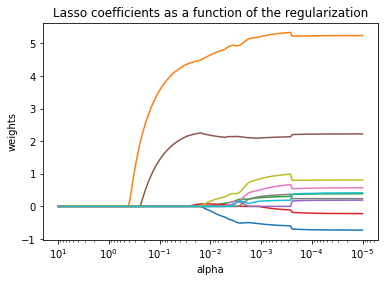

In [15]:
# We will consider a range of alpha values and visualize the tuned weights (parameters) for each alpha
n_alphas = 200
alphas = np.logspace(-5, 1, n_alphas)

coefs = []
R_2=[]
for a in alphas:
    clf = linear_model.Lasso(fit_intercept=True,alpha=a)
    clf.fit(X,y)
    coefs.append(clf.coef_)
    R_2.append(1-((clf.predict(X)-y)**2).mean()/y.var())

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse x-axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

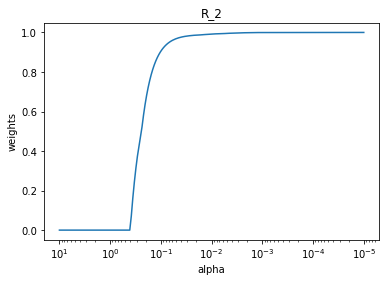

In [16]:
ax = plt.gca()
ax.plot(alphas, R_2)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('R_2')
plt.axis('tight')
plt.show()

### Model selection and Cross-validation

#### (1) Cross-validation: evaluating estimator performance

http://scikit-learn.org/stable/modules/cross_validation.html

#### (2) Or it could be used for tuning hyper-parameters.

http://scikit-learn.org/stable/modules/grid_search.html#grid-search

#### Evaluating estimator performance.
Learning the parameters of a prediction function and testing it on the same data is a methodological mistake: a model that would just repeat the labels of the samples that it has just seen would have a perfect score but would fail to predict anything useful on yet-unseen data. This situation is called overfitting. To avoid it, it is common practice when performing supervised machine learning to hold out part of the available data as a test set (X_test, y_test), then to learn a model on the remaining (training) data and evaluate its accuracy on the test data.

#### Tuning hyper-parameters
If you have a model with important hyper-parameters (e.g., the amount of penalization for Lasso or Ridge regression), you can tune (find good values of) these hyperparameters by further splitting the training data into a training and validation set (still keeping the test data separate from these for a final, unbiased measure of performance).  To tune the hyper-parameters you can try a range of parameter values, learning from the (reduced) training set and evaluating performance on the validation set, and choose the hyper-parameters with best validation set performance.   

In [17]:
# Example data: predicting housing price using 311 calls for service
#path = 'https://serv.cusp.nyu.edu/~cq299/ADS2016/Data/Bayesian/'
data4=pd.read_csv("example4.csv", low_memory=False)
list_311=list(data4.loc[:,"Adopt A Basket":"X Ray Machine Equipment"].columns)
data5=data4[["sale_price","gross_sq_feet","mean"]+list_311]
data5.head()

,sale_price,gross_sq_feet,mean,Adopt A Basket,Air Quality,Animal Abuse,Animal Facility No Permit,Animal in a Park,APPLIANCE,Asbestos,...,Unsanitary Pigeon Condition,Urinating in Public,Vacant Lot,Vending,Violation of Park Rules,Water Conservation,Water Quality,Water System,Window Guard,X Ray Machine Equipment
0,600000,1624,80098.0,0.000000,0.027721,0.0,0.000000,0.000770,0.000257,0.001027,...,0.000000,0.000000,0.000000,0.001797,0.001540,0.003850,0.002053,0.049281,0.0,0.0
1,5200000,3840,149723.0,0.000000,0.010675,0.0,0.000000,0.000227,0.000227,0.003861,...,0.000227,0.000227,0.000000,0.010675,0.000454,0.001817,0.000227,0.050874,0.0,0.0
2,100000,2120,84085.0,0.000000,0.002511,0.0,0.000000,0.001076,0.001973,0.000359,...,0.000000,0.000000,0.004484,0.000000,0.000179,0.007354,0.001256,0.069058,0.0,0.0
3,775000,3423,46614.0,0.000000,0.001476,0.0,0.000000,0.000170,0.006756,0.000738,...,0.000170,0.000170,0.000908,0.000568,0.000170,0.000454,0.000341,0.012433,0.0,0.0
4,151000,2136,44634.0,0.000049,0.001671,0.0,0.000049,0.000344,0.006143,0.000688,...,0.000491,0.000197,0.005897,0.000590,0.000393,0.001622,0.000442,0.037445,0.0,0.0


In [18]:
X=np.asarray(data5.iloc[:,1:])
y=np.asarray(data5.sale_price)
print(X.shape)
print(y.shape)

(2375, 161)
(2375,)


In [19]:
# In-sample R^2 value for linear regression using the whole training dataset
lm=linear_model.LinearRegression()
lm.fit(X,y)
1-((lm.predict(X)-y)**2).mean()/y.var()

0.8919251381230893

In [20]:
# How well do we do out of sample?  Let's split the data into 60% training, 40% test, and average performance over 10 random splits
from sklearn.model_selection import train_test_split

OS=[]
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = i)    
    lm=linear_model.LinearRegression()
    lm.fit(X_train,y_train)
    OS.append(1-((lm.predict(X_test)-y_test)**2).mean()/y_test.var())   # could use OS.append(lm.score(X_test,y_test)) instead
print(np.mean(OS))

-0.14311343418854908


In [21]:
# Does ridge regression do better out of sample?  Let's try with an arbitrary choice of penalization parameter alpha = 1.
OS=[]
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = i)    
    lm=linear_model.Ridge(alpha=1)
    lm.fit(X_train,y_train)
    OS.append(1-((lm.predict(X_test)-y_test)**2).mean()/y_test.var()) # or equivalently: OS.append(lm.score(X_test,y_test))
print(np.mean(OS))

0.536580673591112


#### Hyper-parameter tuning.

http://scikit-learn.org/stable/modules/grid_search.html#grid-search

Exhaustive Grid Search. The grid search provided by GridSearchCV exhaustively generates candidates from a grid of parameter values specified with the param_grid parameter.

Now let's tune the hyper-parameters for ridge regression and calculate the OS R-squared using the new tuned alpha.

In [23]:
from sklearn.model_selection import GridSearchCV
param_grid ={'alpha':np.logspace(-3, 0, 50)}

OS=[]
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = i)
    rid=linear_model.Ridge()
    gr=GridSearchCV(rid,param_grid=param_grid,cv=7)
    rs=gr.fit(X_train,y_train)
    print(rs.best_estimator_)
    OS.append(1-((rs.predict(X_test)-y_test)**2).mean()/y_test.var())
print(np.mean(OS))

Ridge(alpha=0.016768329368110083)
Ridge(alpha=0.001)
Ridge(alpha=0.001)
Ridge(alpha=0.03393221771895328)
Ridge(alpha=0.1206792640639329)
Ridge(alpha=0.019306977288832496)
Ridge(alpha=0.10481131341546852)
Ridge(alpha=0.044984326689694466)
Ridge(alpha=0.001)
Ridge(alpha=0.49417133613238334)
0.5683227806497703


### Decision Tree. 

Stop-and-Frisk Data set: https://en.wikipedia.org/wiki/Stop-and-frisk_in_New_York_City

In [24]:
data=pd.read_csv("session_3_stop.csv")

In [25]:
data.columns

Index(['suspected.crime', 'found.weapon', 'found.gun', 'arrested', 'frisked',
       'searched', 'summons.issued', 'found.contraband', 'force.hands',
       'force.wall', 'force.ground', 'force.drawn', 'force.pointed',
       'force.baton', 'force.handcuffs', 'force.pepper', 'force.other',
       'suspect.race', 'suspect.age', 'suspect.build', 'suspect.sex',
       'suspect.height', 'suspect.weight', 'stopped.bc.desc',
       'stopped.bc.violent', 'stopped.bc.other', 'stopped.bc.object',
       'stopped.bc.casing', 'stopped.bc.lookout', 'stopped.bc.drugs',
       'stopped.bc.clothing', 'stopped.bc.furtive', 'stopped.bc.bulge',
       'precinct', 'inside.outside', 'location.housing', 'observation.period',
       'officer.uniform', 'additional.report', 'additional.investigation',
       'additional.proximity', 'additional.evasive', 'additional.associating',
       'additional.direction', 'additional.highcrime', 'additional.time',
       'additional.sights', 'additional.other', 'radio.run

In [26]:
from sklearn.model_selection import train_test_split
# remove records with any missing values
data=data.dropna()

# Let's take "found.weapon" as the target variable. 
y=data.loc[:,"found.weapon"]

# Get the feature space.  We are using only features from before the stop, getting rid of features from during/after the stop like "arrested".
X=data.loc[:,"suspect.race":"time.period"]
X=pd.get_dummies(X)

# Split data into 70% train, 30% test
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=999)
print(X_train.head())

        suspect.age  suspect.height  suspect.weight  stopped.bc.desc  \
93338            17        5.750000           175.0            False   
145921           15        5.166667           140.0            False   
19160            30        5.583333           260.0            False   
236337           23        5.333333           170.0            False   
46608            29        5.750000           180.0            False   

        stopped.bc.violent  stopped.bc.other  stopped.bc.object  \
93338                False             False              False   
145921               False              True              False   
19160                False              True              False   
236337               False             False               True   
46608                False             False              False   

        stopped.bc.casing  stopped.bc.lookout  stopped.bc.drugs  ...  \
93338               False               False             False  ...   
145921              

#### Part one: IS and OS Accuracy of prediction. 

DecisionTreeClassifier:
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier


In [27]:
from sklearn.tree import DecisionTreeClassifier

# learn model
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

# in sample accuracy
print('In sample accuracy:',dt.score(X_train,y_train))

# out of sample accuracy
print('Out of sample accuracy:',dt.score(X_test,y_test))

In sample accuracy: 0.9999801694520324
Out of sample accuracy: 0.9443711826762909


### Practice #1: Get the average OS accuracy over 10 train/test splits 

In [28]:
# your code here
# your code here
OS=[]
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = i)    
    dt = DecisionTreeClassifier()
    dt.fit(X_train,y_train)
    OS.append(dt.score(X_test,y_test))
print(np.mean(OS))

0.9430328058486026


#### Does that mean our model is super good? However... 

In [29]:
# What would our accuracy be if we predicted 0 (no weapon found) for everyone?
print(1.*len(y_test[y_test==0])/len(y_test))

0.9647765130483065


### Since we have a skewed class distribution (96% "no weapon found"), let's use area under the receiver operating characteristic curve ("ROC AUC") instead of accuracy.

ROC, Area under the curve:
http://scikit-learn.org/stable/modules/model_evaluation.html#roc-metrics

https://en.wikipedia.org/wiki/Receiver_operating_characteristic

Youtube:
https://www.youtube.com/watch?v=hnRBl9-BzjQ

In [30]:
from sklearn.metrics import roc_auc_score
AUC_OS=[]
for i in range(10):
    X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=i)
    dt=DecisionTreeClassifier()
    dt.fit(X_train,y_train)
    # predict_proba predicts the probability of each class rather than just the most likely class
    pred=dt.predict_proba(X_test)[:,1] # predicted probability of y = 1
    AUC_OS.append(roc_auc_score(np.array(y_test),pred))
print("OS AUC",np.mean(AUC_OS))

OS AUC 0.6221161849171152


In [31]:
# How well would we expect to do just by chance?
chance_OS=[]
for i in range(10):
    X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=i)
    pred=np.random.random(len(X_test))
    chance_OS.append(roc_auc_score(np.array(y_test.apply(int)),pred))
print(np.mean(chance_OS))

0.5003243980632395


### Control the complexity of the Decision Tree.

In [32]:
# Let's just use a single train/test split for this part:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3,random_state=999)
AUC_OS=[]
for i in range(2,500,25):
    dt=DecisionTreeClassifier(max_leaf_nodes=i)
    dt.fit(X_train,y_train)
    AUC_OS.append(roc_auc_score(np.array(y_test),dt.predict_proba(X_test)[:,1]))

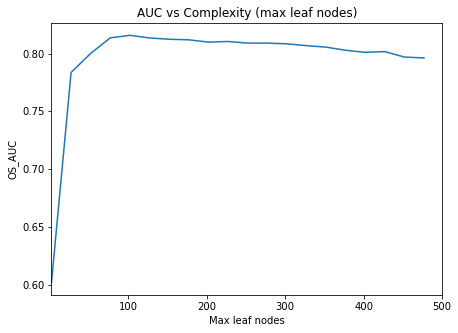

In [33]:
import matplotlib.pylab as plt
plt.figure(figsize=(7,5))
plt.plot(range(2,500,25),AUC_OS)
plt.xlabel("Max leaf nodes")
plt.ylabel("OS_AUC")
plt.title("AUC vs Complexity (max leaf nodes)")
plt.xlim(2,500)
plt.show()

In [34]:
# As an aside: predict_proba vs. predict
tm=pd.concat((pd.DataFrame(dt.predict_proba(X_test)),pd.DataFrame(dt.predict(X_test))),axis=1)
tm.head(5)

,0,1,0
0,0.287671,0.712329,True
1,0.992220,0.007780,False
2,0.992220,0.007780,False
3,0.992220,0.007780,False
4,0.992220,0.007780,False


In [35]:
from sklearn.model_selection import GridSearchCV
# This time we'll use max_depth to control the complexity of the tree, still using the same train/test split as above,
# and optimize the parameter value using GridSearchCV.
param_grid = {'max_depth':range(1,11)}
dt=DecisionTreeClassifier()
gr=GridSearchCV(dt,param_grid=param_grid,scoring='roc_auc')
rs=gr.fit(X_train,y_train)
print(rs.best_estimator_)
print(roc_auc_score(np.array(y_test),rs.predict_proba(X_test)[:,1]))

DecisionTreeClassifier(max_depth=8)
0.8088287404274592


### Feature Importance
Decision trees can be used for feature selection by calculating the Gini importance of each feature (higher = more important).

In [36]:
dt = DecisionTreeClassifier(max_depth=8)
dt.fit(X_train, y_train)
Feature_importance=pd.DataFrame([list(X_train.columns),list(dt.feature_importances_)]).T
Feature_importance.columns=["variables","importance"]

# list the top 5 most important features in order
Feature_importance.sort_values(by="importance",ascending=False).iloc[:5,:]

,variables,importance
6,stopped.bc.object,0.347113
44,location.housing_transit,0.252264
13,precinct,0.0718749
11,stopped.bc.furtive,0.0637695
15,observation.period,0.0316956


In [37]:
# Let's generate our new training and testing model using the top three features.
X_train_simple=X_train.loc[:,["stopped.bc.object","location.housing_transit","precinct"]]
X_test_simple=X_test.loc[:,["stopped.bc.object","location.housing_transit","precinct"]]

# Now let's see the performance of this simple model.
dt = DecisionTreeClassifier(max_depth=8)
dt.fit(X_train_simple, y_train)
print("The AUC score for this simple model with 3 features is",roc_auc_score(y_test,dt.predict_proba(X_test_simple)[:,1]))

The AUC score for this simple model with 3 features is 0.7652671763076443


### Visualize the Tree we built. 

In [38]:
from sklearn import tree

dt = DecisionTreeClassifier(max_depth=2) # just to keep it simple for visualization
dt.fit(X_train,y_train)

# display the output using www.webgraphviz.com, or if you have GraphViz installed on
# your computer, you can use that
print(tree.export_graphviz(dt,out_file=None,
                         feature_names=X_train.columns.values,  
                         class_names=['no weapon found','weapon found'],  
                         filled=True, rounded=True,  
                         special_characters=True,impurity=False).replace("<br/>",", ").replace("&le;","<=").replace("=<","=\"").replace(">,","\","))

digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;
edge [fontname=helvetica] ;
0 [label="stopped.bc.object <= 0.5, samples = 201709, value = [194674, 7035], class = no weapon found", fillcolor="#e68640"] ;
1 [label="location.housing_transit <= 0.5, samples = 197033, value = [191647, 5386], class = no weapon found", fillcolor="#e6853f"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="samples = 192689, value = [188560, 4129], class = no weapon found", fillcolor="#e6843d"] ;
1 -> 2 ;
3 [label="samples = 4344, value = [3087, 1257], class = no weapon found", fillcolor="#f0b48a"] ;
1 -> 3 ;
4 [label="location.housing_transit <= 0.5, samples = 4676, value = [3027, 1649], class = no weapon found", fillcolor="#f3c6a5"] ;
0 -> 4 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
5 [label="samples = 4083, value = [2798, 1285], class = no weapon found", fillcolor="#f1bb94"] ;
4 -> 5 ;
6 [label="samples = 593, value = [229, 

If you want to install GraphViz on your own machine:

conda install graphviz

pip install pydot

pip install pydotplus

For people who experienced this error: "GraphViz's executables not found"

http://stackoverflow.com/questions/18438997/why-is-pydot-unable-to-find-graphvizs-executables-in-windows-8

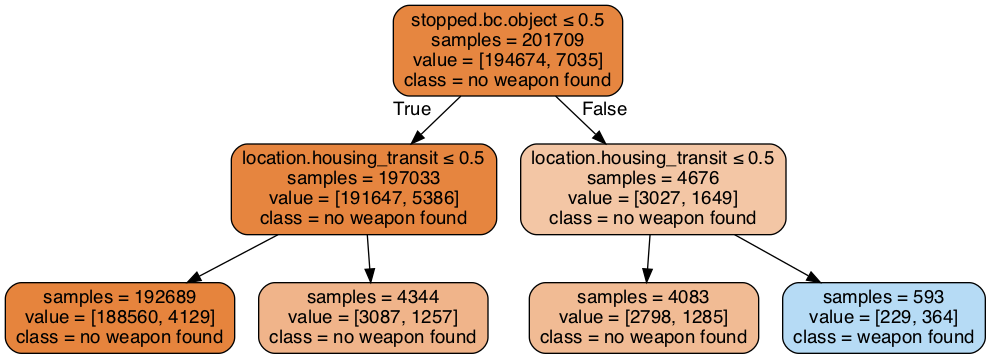

In [39]:
# This will only work if GraphViz is installed on your machine
from sklearn import tree
from IPython.display import Image  
import pydotplus
thestring = tree.export_graphviz(dt, out_file=None,  
                         feature_names=X_train.columns.values, 
                         class_names=['no weapon found','weapon found'],  
                         filled=True, rounded=True,  
                         special_characters=True,impurity=False)
graph = pydotplus.graph_from_dot_data(thestring)  
Image(graph.create_png())  

### Random Forests

http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html


In [40]:
# same training data as above
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=30, n_jobs=-1,max_leaf_nodes=10)
rf.fit(X_train, y_train)
pred=rf.predict_proba(X_test)[:,1]
print(roc_auc_score(y_test,pred))

0.8034948119139547


### Practice #2. Let's fix max_leaf_nodes=10, build forests with between 1 and 50 trees, and plot the AUC as a function of number of trees (n_estimators).

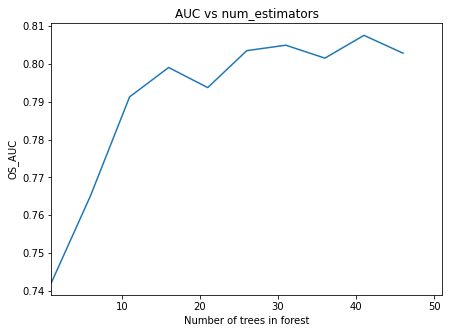

In [41]:
# your code here
# your code here
AUC=[]
for i in range(1,51,5):
    rf = RandomForestClassifier(n_estimators=i, n_jobs=-1,max_leaf_nodes=10)
    rf.fit(X_train, y_train)
    pred=rf.predict_proba(X_test)[:,1]
    AUC.append(roc_auc_score(np.array(y_test),pred))

plt.figure(figsize=(7,5))
plt.plot(range(1,51,5),AUC)
plt.xlabel("Number of trees in forest")
plt.ylabel("OS_AUC")
plt.title("AUC vs num_estimators")
plt.xlim(1,51)
plt.show()

### Practice #3.  Use GridSearchCV to optimize the hyperparameter, n_estimators.

In [42]:
# your code here
# your code here
param_grid = {'n_estimators':range(1,51,5)}
rf = RandomForestClassifier(n_jobs=-1,max_leaf_nodes=10)
gs = GridSearchCV(rf,param_grid=param_grid,scoring='roc_auc')
rs = gs.fit(X_train,y_train)
pred=rs.predict_proba(X_test)[:,1]
print(rs.best_estimator_)
print(roc_auc_score(np.array(y_test),pred))

RandomForestClassifier(max_leaf_nodes=10, n_estimators=41, n_jobs=-1)
0.8005490962008243
